In [1]:
#importing required libraries
import pandas as pd
import numpy as np

#loading csv file into Pandas dataframe
covid_df = pd.read_csv("C:\\Users\\Siba785\\OneDrive - Liquid Intelligent Technologies\\Documents\\Datasets\\Our World in Data\\owid-covid-data.csv")
covid_df.shape

(180356, 67)

In [2]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180356 entries, 0 to 180355
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    180356 non-null  object 
 1   continent                                   169804 non-null  object 
 2   location                                    180356 non-null  object 
 3   date                                        180356 non-null  object 
 4   total_cases                                 173553 non-null  float64
 5   new_cases                                   173381 non-null  float64
 6   new_cases_smoothed                          172212 non-null  float64
 7   total_deaths                                155364 non-null  float64
 8   new_deaths                                  155377 non-null  float64
 9   new_deaths_smoothed                         154230 non-null  float64
 

In [3]:
#we will first remove calculated columns
calc_columns_list = ["total_cases_per_million", "new_cases_per_million", "new_cases_smoothed_per_million",
"total_deaths_per_million", "new_deaths_per_million", "new_deaths_smoothed_per_million", "icu_patients_per_million",
"hosp_patients_per_million", "weekly_icu_admissions_per_million", "weekly_hosp_admissions_per_million",
"total_tests_per_thousand", "new_tests_per_thousand", "new_tests_smoothed_per_thousand", "people_fully_vaccinated",
"total_vaccinations_per_hundred", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred",
"new_vaccinations_smoothed_per_million", "new_people_vaccinated_smoothed_per_hundred", "excess_mortality_cumulative_per_million",
"total_boosters_per_hundred", "tests_per_case"]

#method to drop columns
def drop_cols(df, col_list):
    new_df = df.drop(col_list, axis=1)
    return new_df

df1 = drop_cols(covid_df, calc_columns_list)    

In [4]:
df1.shape

(180356, 45)

In [5]:
#lets drop total columns because we can calculate these from raw data in columns
total_columns_list = ["total_cases", "total_deaths", "total_tests", "total_vaccinations"]

df2 = drop_cols(df1, total_columns_list)

df2.shape

(180356, 41)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180356 entries, 0 to 180355
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   iso_code                              180356 non-null  object 
 1   continent                             169804 non-null  object 
 2   location                              180356 non-null  object 
 3   date                                  180356 non-null  object 
 4   new_cases                             173381 non-null  float64
 5   new_cases_smoothed                    172212 non-null  float64
 6   new_deaths                            155377 non-null  float64
 7   new_deaths_smoothed                   154230 non-null  float64
 8   reproduction_rate                     134600 non-null  float64
 9   icu_patients                          24733 non-null   float64
 10  hosp_patients                         25454 non-null   float64
 11  

In [7]:
#dropping ISO Code column
df2.drop(["iso_code"], axis=1, inplace=True)

<AxesSubplot:>

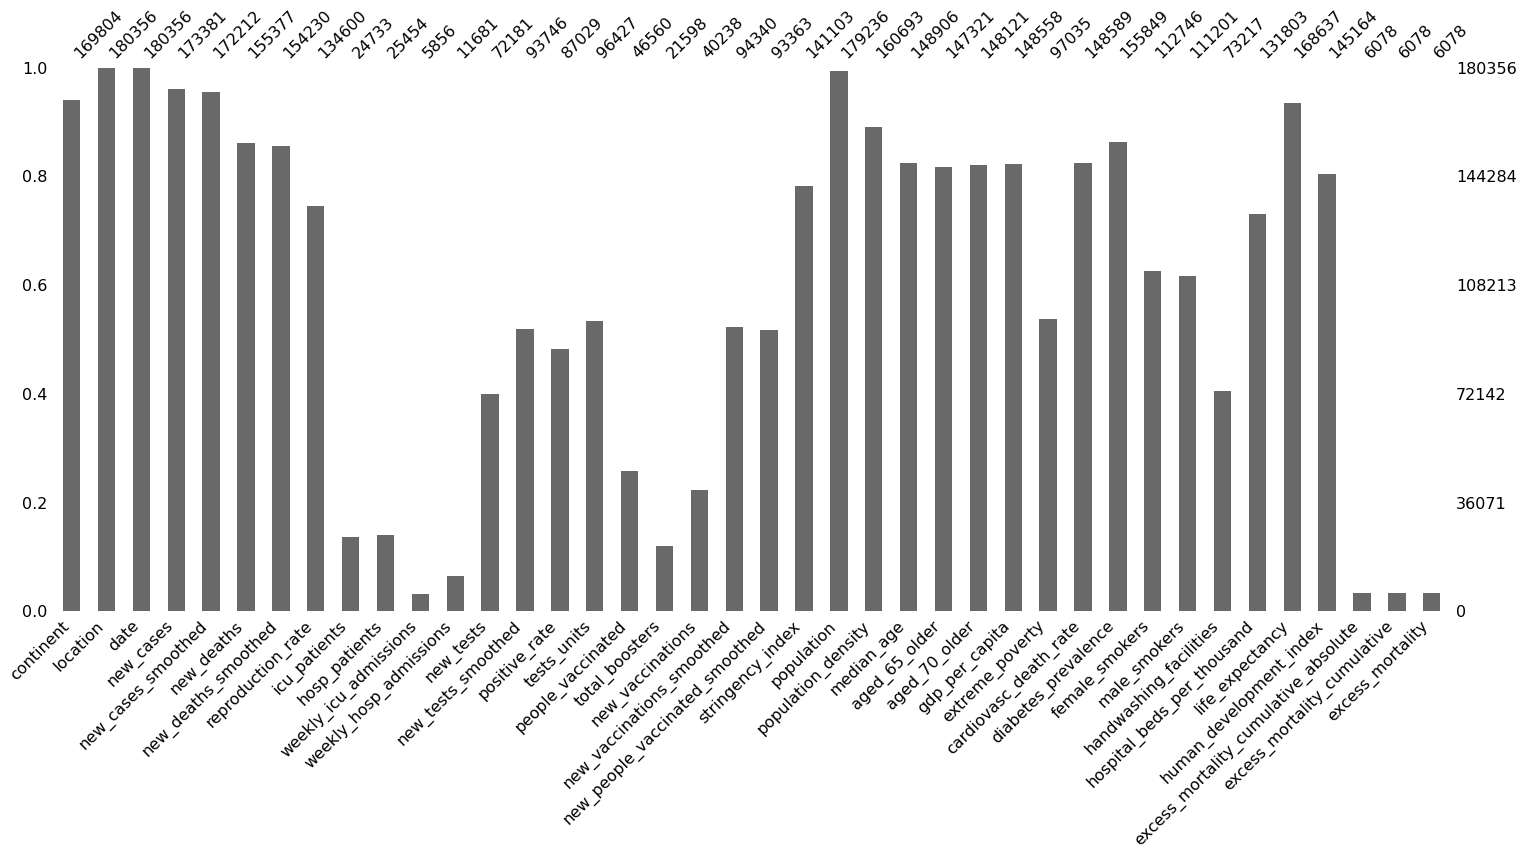

In [8]:
#visualizing missing data
import missingno as msno
msno.bar(df2)

In [9]:
#filling all missing numeric values with zeroes
num_col_list = ["new_cases", "new_cases_smoothed", "new_deaths", "new_deaths_smoothed", "reproduction_rate",
"icu_patients", "hosp_patients", "weekly_icu_admissions", "weekly_hosp_admissions", "new_tests", "new_tests_smoothed", "positive_rate",
"tests_units", "people_vaccinated", "total_boosters", "new_vaccinations", "new_vaccinations_smoothed", "new_people_vaccinated_smoothed",
"stringency_index", "population", "population_density", "median_age", "aged_65_older", "aged_70_older", "gdp_per_capita",
"extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers", "handwashing_facilities", 
"hospital_beds_per_thousand", "life_expectancy", "human_development_index", "excess_mortality_cumulative_absolute", 
"excess_mortality_cumulative", "excess_mortality"]

for col in num_col_list:
    df2[col].fillna(value=0, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180356 entries, 0 to 180355
Data columns (total 40 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   continent                             169804 non-null  object 
 1   location                              180356 non-null  object 
 2   date                                  180356 non-null  object 
 3   new_cases                             180356 non-null  float64
 4   new_cases_smoothed                    180356 non-null  float64
 5   new_deaths                            180356 non-null  float64
 6   new_deaths_smoothed                   180356 non-null  float64
 7   reproduction_rate                     180356 non-null  float64
 8   icu_patients                          180356 non-null  float64
 9   hosp_patients                         180356 non-null  float64
 10  weekly_icu_admissions                 180356 non-null  float64
 11  

In [10]:
#investigating wich countries(location) do not have continent values
no_continent_df = df2.loc[df2["continent"].isnull()]

no_continent_df["location"].value_counts()

Asia                   820
High income            820
Lower middle income    820
North America          820
Upper middle income    820
World                  820
Europe                 819
European Union         819
Oceania                817
International          803
Africa                 798
South America          789
Low income             787
Name: location, dtype: int64

In [11]:
#renaming location column to Country
df2.rename(columns = {"location" : "Country"}, inplace=True)

These are not countries and therefore they will duplicate data. We will drop the values row-wise.

In [12]:
df3 = df2.dropna(axis=0)
df3.shape

(169804, 40)

In [13]:
#checking if there is still any missing values
df3.isnull().sum()

continent                               0
Country                                 0
date                                    0
new_cases                               0
new_cases_smoothed                      0
new_deaths                              0
new_deaths_smoothed                     0
reproduction_rate                       0
icu_patients                            0
hosp_patients                           0
weekly_icu_admissions                   0
weekly_hosp_admissions                  0
new_tests                               0
new_tests_smoothed                      0
positive_rate                           0
tests_units                             0
people_vaccinated                       0
total_boosters                          0
new_vaccinations                        0
new_vaccinations_smoothed               0
new_people_vaccinated_smoothed          0
stringency_index                        0
population                              0
population_density                

<AxesSubplot:>

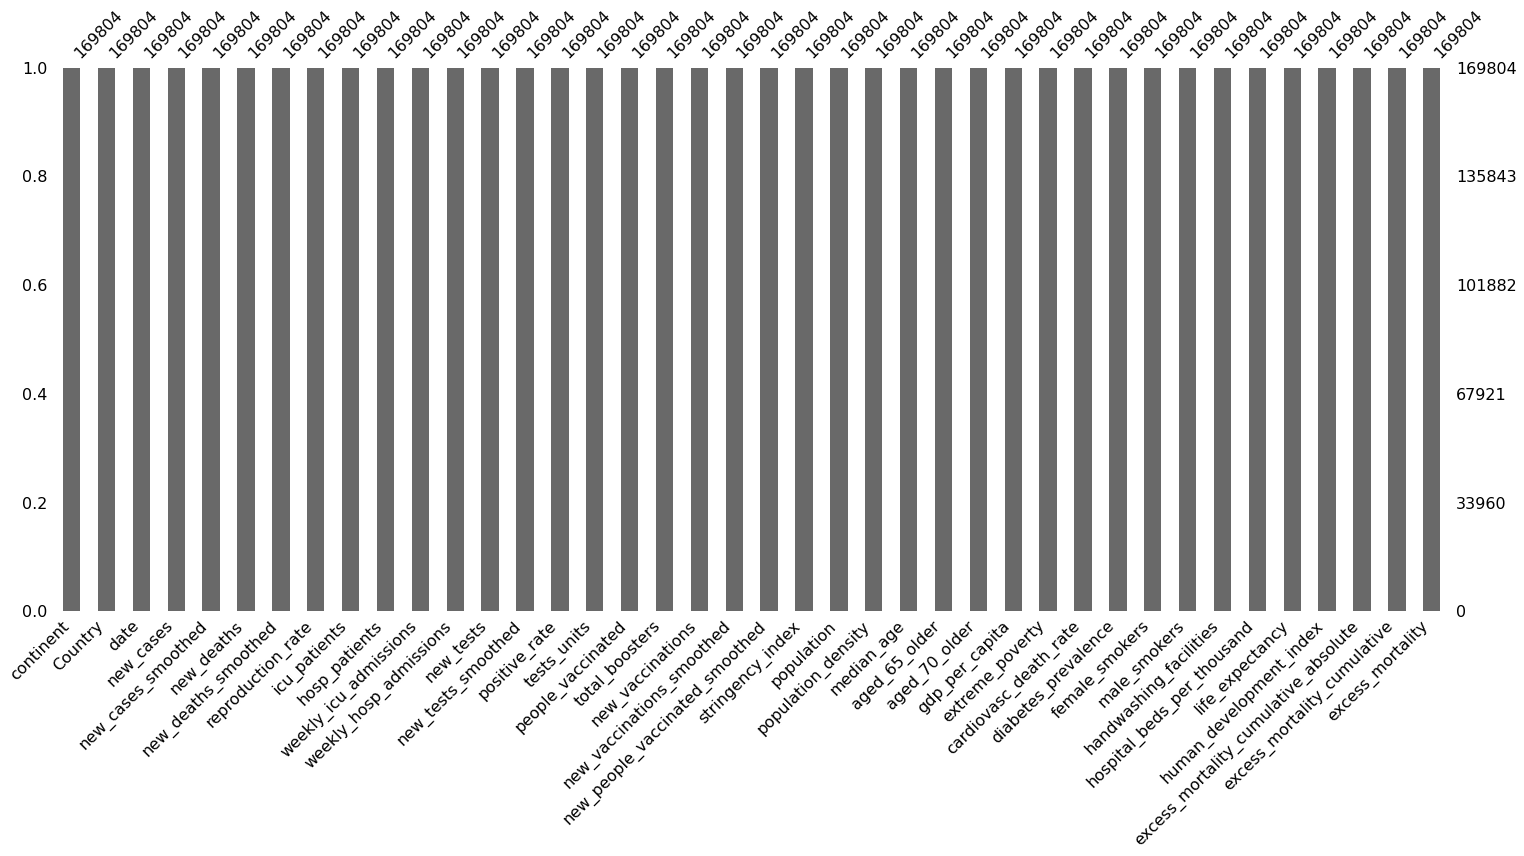

In [14]:
msno.bar(df3)

There are no more missing values, therefore we can save this dataframe to a csv file


In [15]:
df3.head(10)

,continent,Country,date,new_cases,new_cases_smoothed,new_deaths,new_deaths_smoothed,reproduction_rate,icu_patients,hosp_patients,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,Asia,Afghanistan,2020-02-24,5.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
1,Asia,Afghanistan,2020-02-25,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
2,Asia,Afghanistan,2020-02-26,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
3,Asia,Afghanistan,2020-02-27,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
4,Asia,Afghanistan,2020-02-28,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
5,Asia,Afghanistan,2020-02-29,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
6,Asia,Afghanistan,2020-03-01,0.0,0.714,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
7,Asia,Afghanistan,2020-03-02,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
8,Asia,Afghanistan,2020-03-03,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0
9,Asia,Afghanistan,2020-03-04,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,9.59,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0


In [16]:
#Saving the dataframe as a csv output file
output = df3
output.to_csv('C:\\Users\\Siba785\\OneDrive - Liquid Intelligent Technologies\\Documents\\Datasets\\Our World in Data\\clean_covid_data.csv', index=False)